# Análisis de K-Means para Barrios de Medellín

# Paso 1: Carga y preparació n de datos

In [22]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np

df = pd.read_csv('Barrios_Medellin.csv')
df.head()

,BARRIO,Lat,Long,Nombre_Comuna,Numero_Comuna
0,EL PESEBRE,6.27526,-75.6030,SAN JAVIER,13
1,BLANQUIZAL,6.27674,-75.6090,SAN JAVIER,13
2,LA GABRIELA,6.26982,-75.6253,SAN JAVIER,13
3,JUAN XXIII - LA QUIEBRA,6.26905,-75.6191,SAN JAVIER,13
4,METROPOLITANO,6.26936,-75.6139,SAN JAVIER,13


In [23]:
# Seleccionas las columnas que necesitas

data = df[['Lat','Long']]
data.head(5)

,Lat,Long
0,6.27526,-75.6030
1,6.27674,-75.6090
2,6.26982,-75.6253
3,6.26905,-75.6191
4,6.26936,-75.6139


### Visualización exploratoria

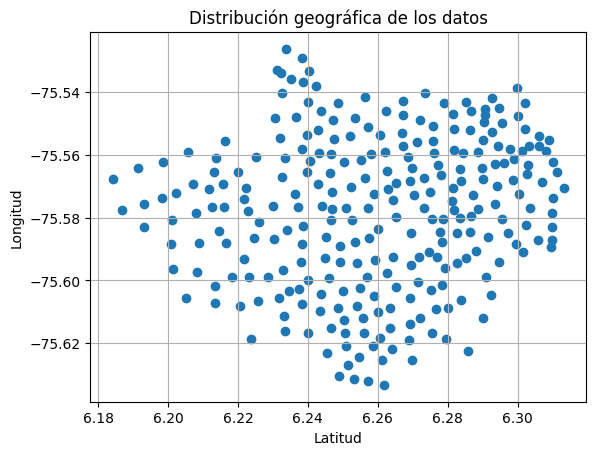

In [24]:
import matplotlib.pyplot as plt

plt.scatter(data['Lat'], data['Long'])
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Distribución geográfica de los datos')
plt.grid(True)
plt.show()

## Paso 2: Definir k 

**Método del codo**

Busca el punto donde la curva deja de disminuir significativamente (como un codo); ese puede ser el número óptimo de clusters.

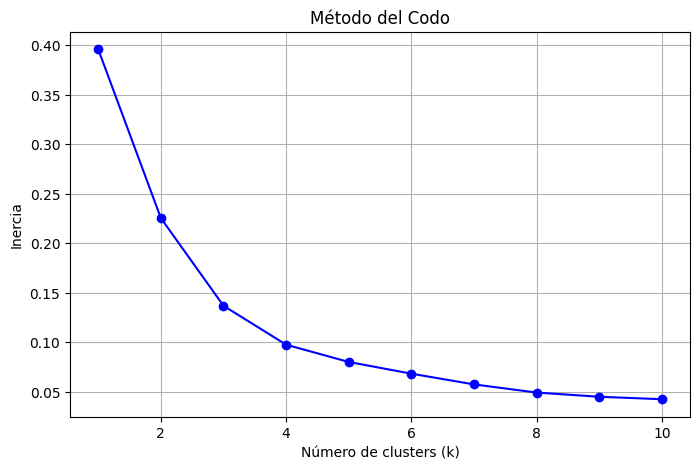

In [25]:
from sklearn.cluster import KMeans

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()


**Método del Silhouette**

El mejor k es el que tiene el mayor Silhouette Score. Un valor cercano a 1 indica buenos clusters, valores cercanos a 0 indican solapamiento.

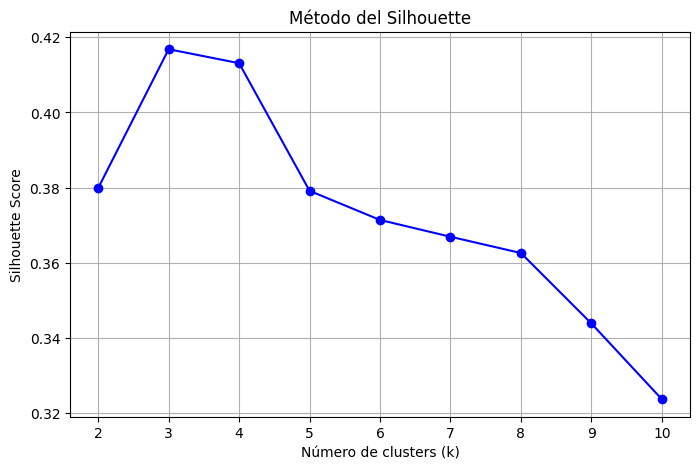

In [26]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Empieza en 2 porque no se puede calcular silhouette para k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico de Silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Método del Silhouette')
plt.grid(True)
plt.show()


## 6. Entrenar el modelo K-Means con el número óptimo de clusters

In [27]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos (opcional pero recomendable)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [28]:
k_optimo = 4  # Basado en el gráfico del codo
modelo = KMeans(n_clusters=k_optimo, random_state=42)
modelo.fit(X_scaled) # Entrenamos el modelo con los datos escalados

KMeans(n_clusters=4, random_state=42)

In [29]:
# Ver las etiquetas de cluster asignadas a cada punto
print("Etiquetas de cluster asignadas por K-Means:")
print(modelo.labels_)

Etiquetas de cluster asignadas por K-Means:
[2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 2 2 2 2 2 2 2 2 2 3 2
 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
# 7. Añadir los clusters al DataFrame original
df['cluster'] = modelo.labels_

## 7. Evaluación: puntuación de silueta

La puntuación de silueta es una métrica que evalúa qué tan bien separados y cohesionados están los clusters formados por el algoritmo K-Means. Esta métrica toma valores entre -1 y 1, y se interpreta de la siguiente manera:

- Cercano a 1: Los puntos están bien agrupados dentro de su propio cluster y claramente separados de los demás. Esto indica una buena estructura de clustering.

- Cerca de 0: Los clusters se solapan o los puntos están en el límite entre varios clusters. La segmentación no es clara.

- Menor a 0: Algunos puntos están mal asignados a un cluster equivocado, lo que sugiere un mal número de clusters o datos no adecuados para K-Means.

Una buena puntuación generalmente está por encima de 0.5. Este valor te ayuda a validar si el número de clusters elegido realmente segmenta bien tus datos.

In [31]:
from sklearn import metrics

score = silhouette_score(X_scaled, modelo.labels_)
print(f"Puntuación de silueta: {score:.2f}")

Puntuación de silueta: 0.35


Una puntuación mayor a 0.5 se considera generalmente buena. Si es menor a 0.3, probablemente deberías revisar el número de clusters o los datos usados.

## 9. Visualizar los clusters (2D si es posible)

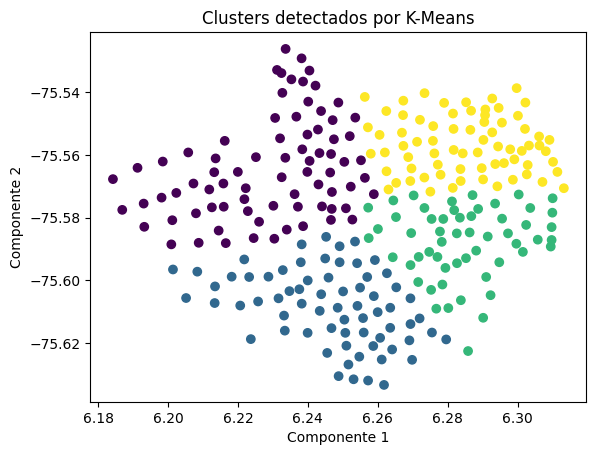

In [39]:
plt.scatter(data['Lat'], data['Long'], c=df['cluster'], cmap='viridis')
plt.title('Clusters detectados por K-Means')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

In [33]:
# Miremos las coordenadas centroides

modelo.cluster_centers_

array([[-1.01987322,  0.58061227],
       [-0.43662709, -1.26255218],
       [ 0.84837431, -0.40474722],
       [ 0.86704639,  0.89306338]])

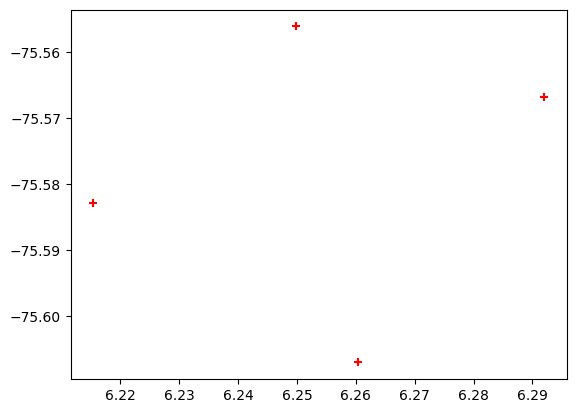

In [ ]:
# Dibujemos los centroides

plt.scatter(
    modelo.cluster_centers_[:,0],
    modelo.cluster_centers_[:,1],
    marker = '+',
    c = 'red'
)

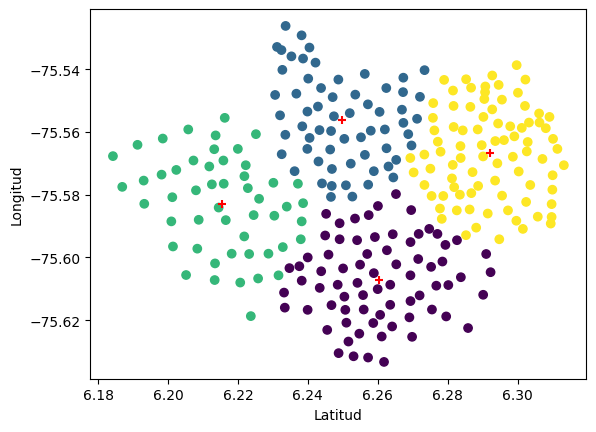

In [ ]:
# Scatter de los grupos
plt.scatter(df['Lat'], df['Long'], c = modelo.labels_)
plt.xlabel('Latitud')
plt.ylabel('Longitud')

# centroides
plt.scatter(
    modelo.cluster_centers_[:,0],
    modelo.cluster_centers_[:,1],
    marker = '+',
    c = 'red',

)
plt.show()


# 📝 Conclusiones

- Se identificaron agrupaciones (clusters) de barrios en Medellín con base en sus características.
- El método del codo sugirió un número óptimo de **4 clusters**.
- Se utilizó el algoritmo **K-Means** para segmentar los datos y se evaluó con la puntuación de silueta.
- Este análisis puede apoyar la planificación urbana, decisiones comerciales o políticas públicas.



##  Predicción con nuevos datos

Puedes ingresar características de un nuevo barrio para predecir a qué cluster pertenecería.


In [38]:

nuevo = [[2.5, 3.0]]  # Ajusta con datos reales
nuevo_scaled = scaler.transform(nuevo)
pred = modelo.predict(nuevo_scaled)
print(f"El nuevo dato pertenece al cluster: {pred[0]}")


El nuevo dato pertenece al cluster: 3


c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
